📌 Dataset Loaded:
   Age   BMI  Smoking  Diabetes Exercise_Level  BP_Status
0   66  28.6        1         1         Medium          1
1   50  32.3        1         0            Low          1
2   29  24.3        1         0            Low          1
3   63  22.9        0         0         Medium          0
4   51  23.3        0         0         Medium          0

📊 MODEL PERFORMANCE COMPARISON
--------------------------------
Ridge Regression  → RMSE: 0.278 | R² Score: 0.392
Lasso Regression  → RMSE: 0.329 | R² Score: 0.149


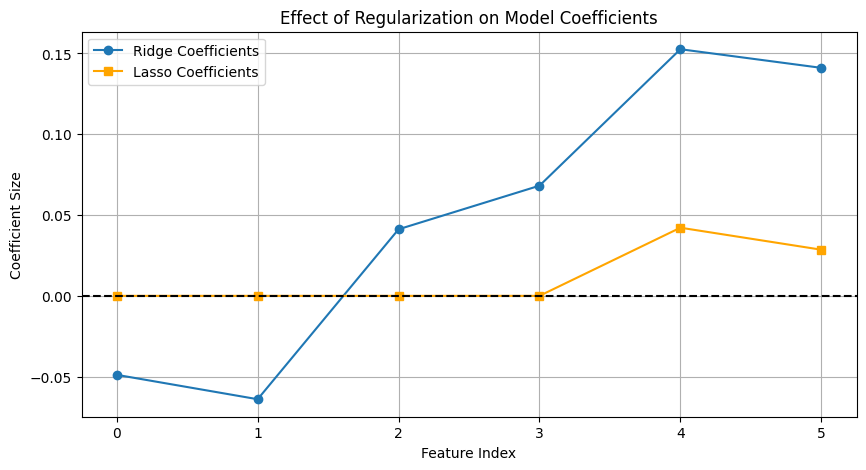

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# ---------------- LOAD DATA ----------------
df = pd.read_csv("BP_Dataset.csv")
print("📌 Dataset Loaded:")
print(df.head())

# ---------------- PREPROCESSING ----------------
# Separate features and target
X = df.drop(columns=["BP_Status"])
y = df["BP_Status"]  # regression target (still numeric)

# Encode categorical variable + scale numerical features
ct = ColumnTransformer([
    ("encode", OneHotEncoder(drop='first'), ["Exercise_Level"]),
    ("scale", StandardScaler(), ["Age", "BMI", "Smoking", "Diabetes"])
], remainder="drop")

X_processed = ct.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# ---------------- TRAIN RIDGE & LASSO MODELS ----------------
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# ---------------- PREDICTIONS ----------------
ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)

# ---------------- EVALUATION ----------------
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("\n📊 MODEL PERFORMANCE COMPARISON")
print("--------------------------------")
print(f"Ridge Regression  → RMSE: {ridge_rmse:.3f} | R² Score: {ridge_r2:.3f}")
print(f"Lasso Regression  → RMSE: {lasso_rmse:.3f} | R² Score: {lasso_r2:.3f}")

# ---------------- COEFFICIENT ANALYSIS ----------------
ridge_coef = ridge.coef_
lasso_coef = lasso.coef_

plt.figure(figsize=(10,5))
plt.plot(ridge_coef, marker='o', label="Ridge Coefficients")
plt.plot(lasso_coef, marker='s', label="Lasso Coefficients", color="orange")
plt.axhline(0, color='black', linestyle='--')
plt.title("Effect of Regularization on Model Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Size")
plt.legend()
plt.grid(True)
plt.show()

